# **CMPSC497 Fall 2022 Programming Assignment 2**

Notebook by Anish Phule

# Task 1: Data Preprocessing

In [322]:
#Importing various libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator
from math import ceil 
from scipy.spatial import distance
import math

In [323]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [324]:
#This makes all figures appear bigger in the notebook
plt.rcParams['figure.figsize'] = [10, 5]

In [325]:
#Reading the input csv file
df = pd.read_csv (r'/content/drive/MyDrive/CMPSC497/credit cards-2022-post.csv')
df.to_excel (r'/content/drive/MyDrive/CMPSC497/credit_cards.xlsx', index = None, header=True)

In [326]:
#Clearing unclear or questionable values
for index, row in df.iterrows():
    if (row['EDUCATION'] < 1):
        row['EDUCATION'] = 1
    elif (row['EDUCATION'] >4):
        row['EDUCATION'] = 4
    if (row['MARRIAGE'] < 1):
        row['MARRIAGE'] = 1
  
pay_list = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for index, row in df.iterrows():
    for i in range(len(pay_list)):
        if (row[pay_list[i]] < 0):
            row[pay_list[i]] = 0
        
df = df.reset_index()
df.to_excel (r'/content/drive/MyDrive/CMPSC497/credit_cards_cleared.xlsx', index = None, header=True)

##Task 1(a): Creating new Features

We create 6 new features, the Remaining balance, defined as 'Bill Amount - Pay Amount'. 

In [327]:
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
#We create 6 new features called Remaining Balance, which is the difference between bill amount and pay amount
rem_bal = ['REM_BAL1','REM_BAL2','REM_BAL3','REM_BAL4','REM_BAL5','REM_BAL6']

for i in range(6):
    df[rem_bal[i]] = df[bill_amt[i]] - df[pay_amt[i]]

df.to_excel (r'/content/drive/MyDrive/CMPSC497/credit_cards_updated.xlsx', index = None, header=True)
df.head(3)

,index,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,REM_BAL1,REM_BAL2,REM_BAL3,REM_BAL4,REM_BAL5,REM_BAL6
0,0,5771,180000,1,2,1,38,1,2,2,...,124,0,0,1,826,4412,4071,4947,5195,0
1,1,3999,20000,2,1,2,23,2,2,2,...,500,0,1000,1,6236,12559,11459,12457,13104,11744
2,2,397,100000,1,1,2,38,0,0,0,...,0,579,0,0,38308,41453,41491,43011,42432,28947


## Task 1(b): Principle Component Analysis

We take the 18 features from Bill amount, Pay Amount and Remaining balance, and perform Principle Component Analysis to reduce the Dimensionality. 

In [328]:
#We first need to standardize our attributes for PCA
attr = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','REM_BAL1','REM_BAL2','REM_BAL3','REM_BAL4','REM_BAL5','REM_BAL6']
df_pca = df[attr]

for i in attr:
  mean = df_pca[i].mean()
  std = df_pca[i].std()
  df_pca[i]=(df_pca[i]- mean)/std

df_pca.head(3)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,REM_BAL1,REM_BAL2,REM_BAL3,REM_BAL4,REM_BAL5,REM_BAL6
0,-0.661082,-0.627831,-0.612095,-0.596497,-0.580089,-0.656619,-0.216708,-0.237318,-0.274405,-0.294510,-0.310511,-0.291435,-0.614494,-0.532564,-0.543989,-0.523671,-0.500633,-0.563364
1,-0.566379,-0.512940,-0.498629,-0.473366,-0.449176,-0.441485,-0.127637,-0.237318,-0.245231,-0.270887,-0.310511,-0.235529,-0.539932,-0.420507,-0.437804,-0.406328,-0.369513,-0.366943
2,-0.140501,-0.091370,-0.068644,-0.004104,0.045857,-0.167959,-0.186899,-0.196406,-0.253399,-0.302300,-0.273426,-0.291435,-0.097910,-0.023087,-0.006167,0.071075,0.116704,-0.079220


In [329]:
X_train = df_pca

from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=100)
X = pca.fit_transform(X_train) #running Principal Component analysis on the data

In [330]:
df_new = pd.DataFrame(X, columns = ['A','B','C']) #I'm calling the components A,B and C
df_new.head(3)

,A,B,C
0,-2.098848,-0.332509,-0.076862
1,-1.650113,-0.298452,-0.108871
2,-0.213877,-0.537090,-0.109664


##Task 1(c): Normalization

Before clustering, we need to normalize the 3 newly created features. I used the min-max scheme, which involves bringing the lowest value to 0, and all other values are subtracted by the min value, and then all values are divided by the range, to effectively give us a [0,1] range. 

In [331]:
columns = ['A','B','C']
for i in columns:
  df_new[i] = (df_new[i] - df_new[i].min())/(df_new[i].max() - df_new[i].min())

df_new.head(3)

,A,B,C
0,0.076566,0.035675,0.371407
1,0.090043,0.036034,0.370660
2,0.133176,0.033519,0.370642


#Task 3: Hierarchal Clustering

In this task, we perform hierarchal clustering using different methods of Agglomerative clustering. 

##Task 3(a): MIN Hierarchal Clustering

In [332]:
import sys
sys.setrecursionlimit(24000) #increasing recursion limit for dendogram construction

In [333]:
#creating the dendogram function for further use
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import collections
def CountFrequency(arr):
    return collections.Counter(arr)

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

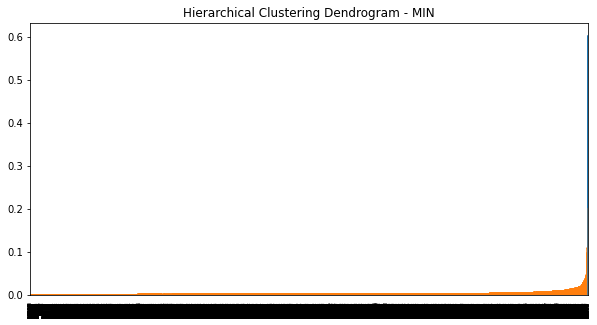

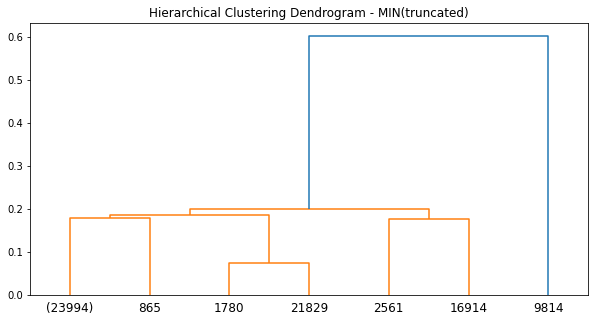

In [334]:
#We perform agglomerative clustering based on the MIN algo for n_clusters = 5
model_min = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=5, linkage='single', compute_distances=True).fit(df_new)

plt.title('Hierarchical Clustering Dendrogram - MIN') #Full dendogram
plot_dendrogram(model_min)
plt.show()

plt.title('Hierarchical Clustering Dendrogram - MIN(truncated)') #Truncated dendogram to a certain level
plot_dendrogram(model_min, truncate_mode="level", p=3)
plt.show()

In [335]:
#Counting frequency of each cluster label
freq = CountFrequency(model_min.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in freq.items():
  print (key, " -> ", value) #number of elements in each cluster

1  ->  23994
2  ->  1
4  ->  2
0  ->  2
3  ->  1


As visible from the above result of MIN clustering, the dendogram shows that almost all of the clustering is very skewed towards only one cluster, and the frequency count tells us the same. In the next block we vary the number of clusters and the distance threshold, but the results are most likely to remain the same, since the clustering is so skewed. The single digit clusters might also count towards noise, so we must keep those in mind as well. hanging number of clusters or changing the distance threshold is equivalent to cutting the dendogram at a different level. By increasing the number of clusters or reducing distance threshold, we go lower and lower, so that we can clearly see subclusters inside the large cluster. We perform the same below.

Since the points seemed to be in more clusters below 0.1, we will try to change the distance threshold to 0.05

In [336]:
model_min2 = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=9, linkage='single', compute_distances=True).fit(df_new)

freq = CountFrequency(model_min2.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in freq.items():
  print (key, " -> ", value)

0  ->  23989
5  ->  1
1  ->  2
6  ->  1
7  ->  1
8  ->  1
4  ->  1
2  ->  3
3  ->  1


In [337]:
model_min3 = AgglomerativeClustering(distance_threshold=0.05, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_new)

freq = CountFrequency(model_min3.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in freq.items():
  if value > 5:
   print (key, " -> ", value)

0  ->  23945
4  ->  6


Changing the no. of clusters doesn't seem to give us any different results than before. Changing the distance gives us one more cluster with more than 5 points. So we will try one more time with even lower distance threshold of 0.00055

In [338]:
model_min4 = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_new)

minfreq = CountFrequency(model_min4.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 50:
   print (key, " -> ", value)

23  ->  7462
96  ->  94
48  ->  589
781  ->  76
787  ->  218
783  ->  73
97  ->  51


As visible from above, we get better clusters than the ones in previous parts. These don't encompass all the points, but do give us bigger and more spread clusters. This is an overall balance of spread and cluster size, which I obtained by trial and error. The top 5 cluster labels would be 23, 48, 787, 96 and 781. 

In [339]:
min_label_list = sorted(minfreq, key=minfreq.get, reverse=True) #list of all sorted labels
max_label_min = sorted(minfreq, key=minfreq.get, reverse=True)[:5] #List of top 5 sorted labels
print(max_label_min)

df_MIN = pd.concat([df,df_new], axis=1)
df_MIN['min_label'] = model_min4.labels_

for label in max_label_min:
  print("Label:", label)
  df_temp = df_MIN.loc[df_MIN['min_label'] == label]
  print(df_temp.head(5)) #Printing first 5 data points of each cluster

[23, 48, 787, 96, 781]
Label: 23
    index     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0       0   5771     180000    1          2         1   38      1      2   
1       1   3999      20000    2          1         2   23      2      2   
6       6   6037      80000    2          3         1   39      0      0   
10     10   5029      80000    2          3         1   53      0      0   
13     13  23428     200000    2          3         2   33      1      2   

    PAY_3  ...  REM_BAL1  REM_BAL2  REM_BAL3  REM_BAL4  REM_BAL5  REM_BAL6  \
0       2  ...       826      4412      4071      4947      5195         0   
1       2  ...      6236     12559     11459     12457     13104     11744   
6       0  ...       280         0      5000     -5000     -5000      4530   
10      0  ...         0         0         0         0         0         0   
13      0  ...     18021     14347      9240     17314     14245         0   

           A         B         C  min_lab

##Task 3(b) MAX Hierarchal Clustering

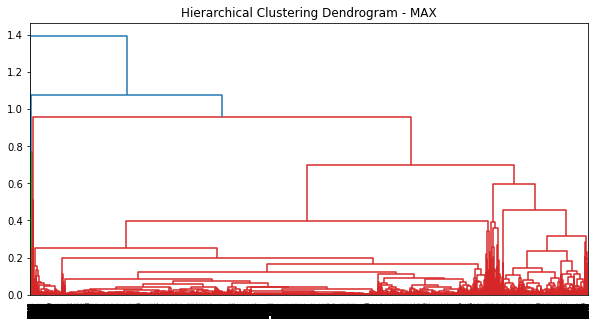

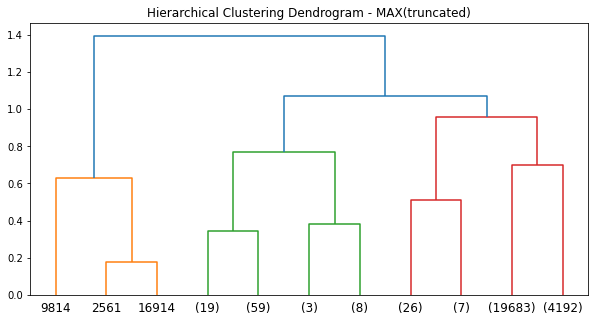

In [340]:
model_max = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=5, linkage='complete', compute_distances=True).fit(df_new)

plt.title('Hierarchical Clustering Dendrogram - MAX')
plot_dendrogram(model_max)
plt.show()

plt.title('Hierarchical Clustering Dendrogram - MAX(truncated)')
plot_dendrogram(model_max, truncate_mode="level", p=3)
plt.show()

In [341]:
freq = CountFrequency(model_max.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in freq.items():
  print (key, " -> ", value)

0  ->  23875
3  ->  33
4  ->  78
2  ->  11
1  ->  3


MAX Agglomerative algorithm offers a more diverse clustering, with points clustered in a much better manner. In the above result, we see the obtained 5 clusters are bigger and better than MIN, however, a huge number of points still belongs to only one cluster. This warrants change in the number of clusters or the distance_threshold, like the one in the previous section. Changing number of clusters or changing the distance threshold is equivalent to cutting the dendogram at a different level. By increasing the number of clusters, we go lower and lower, so that we can clearly see subclusters inside the large cluster. We perform the same below.

In [342]:
model_max2 = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=10, linkage='complete', compute_distances=True).fit(df_new)

freq = CountFrequency(model_max2.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in freq.items():
  if value > 50:
   print (key, " -> ", value)

0  ->  19683
5  ->  3657
1  ->  530
4  ->  78


This is a good spread, but we can do better. Let's drastically increase n_clusters

In [343]:
model_max3 = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=75, linkage='complete', compute_distances=True).fit(df_new)

maxfreq = CountFrequency(model_max3.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in maxfreq.items():
  if value > 50:
   print (key, " -> ", value)



35  ->  13454
9  ->  4112
0  ->  1631
5  ->  475
11  ->  1115
12  ->  851
16  ->  447
20  ->  54
63  ->  57
15  ->  511
4  ->  198
36  ->  51
47  ->  102
28  ->  51
68  ->  73
56  ->  109
7  ->  137
27  ->  51
21  ->  75


As visible from above, we get better clusters than the ones in previous parts. These don't encompass all the points, but do give us bigger and more spread clusters. This is an overall balance of spread and cluster size. The top 5 cluster labels would be 35, 9, 0, 11 and 12. 

In [344]:
max_label_list = sorted(maxfreq, key=maxfreq.get, reverse=True) #List of all sorted cluster labels
max_label_max = sorted(maxfreq, key=maxfreq.get, reverse=True)[:5] #list of top 5 cluster labels
print(max_label_max)

df_MAX = df_MIN
df_MAX['max_label'] = model_max3.labels_

for label in max_label_max:
  print("Label:", label)
  df_temp = df_MAX.loc[df_MAX['max_label'] == label]
  print(df_temp.head(5))

[35, 9, 0, 11, 12]
Label: 35
    index     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0       0   5771     180000    1          2         1   38      1      2   
1       1   3999      20000    2          1         2   23      2      2   
6       6   6037      80000    2          3         1   39      0      0   
8       8  25059     130000    1          3         2   49      0      0   
10     10   5029      80000    2          3         1   53      0      0   

    PAY_3  ...  REM_BAL2  REM_BAL3  REM_BAL4  REM_BAL5  REM_BAL6         A  \
0       2  ...      4412      4071      4947      5195         0  0.076566   
1       2  ...     12559     11459     12457     13104     11744  0.090043   
6       0  ...         0      5000     -5000     -5000      4530  0.075394   
8       0  ...     17148      9158     16871      4225      2536  0.093301   
10      0  ...         0         0         0         0         0  0.070793   

           B         C  min_label  max_label 

##Task 3(c): WARD Hierarchal Clustering

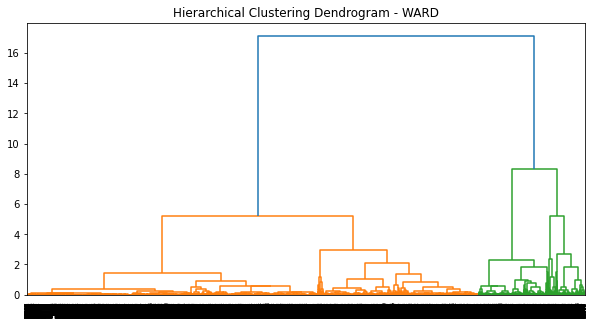

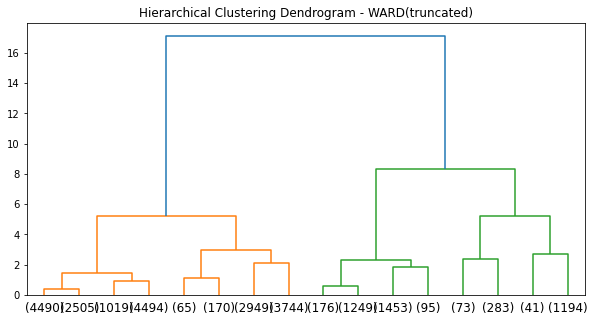

In [345]:
model_ward = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=5, linkage='ward', compute_distances=True).fit(df_new)

plt.title('Hierarchical Clustering Dendrogram - WARD')
plot_dendrogram(model_ward)
plt.show()

plt.title('Hierarchical Clustering Dendrogram - WARD(truncated)')
plot_dendrogram(model_ward, truncate_mode="level", p=3)
plt.show()

In [346]:
wardfreq = CountFrequency(model_ward.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in wardfreq.items():
  print (key, " -> ", value)

4  ->  12508
0  ->  6928
2  ->  2973
1  ->  1235
3  ->  356


WARD algorithm gives us the best default clustering. The clusters aren't really concentrated and the dendogram shows how well they are connected. The cluster sizes obtained are good as well. In my opinion, we donot need to further change the values and check for other clusterings.

In [347]:
ward_label_list = sorted(wardfreq, key=wardfreq.get, reverse=True)
max_label_ward = sorted(wardfreq, key=wardfreq.get, reverse=True)[:5]
print(max_label_ward)

df_WARD = df_MAX
df_WARD['ward_label'] = model_ward.labels_

for label in max_label_ward:
  print("Label:", label)
  df_temp = df_WARD.loc[df_MAX['ward_label'] == label]
  print(df_temp.head(5))

[4, 0, 2, 1, 3]
Label: 4
    index     ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  \
0       0   5771     180000    1          2         1   38      1      2   
1       1   3999      20000    2          1         2   23      2      2   
6       6   6037      80000    2          3         1   39      0      0   
8       8  25059     130000    1          3         2   49      0      0   
10     10   5029      80000    2          3         1   53      0      0   

    PAY_3  ...  REM_BAL3  REM_BAL4  REM_BAL5  REM_BAL6         A         B  \
0       2  ...      4071      4947      5195         0  0.076566  0.035675   
1       2  ...     11459     12457     13104     11744  0.090043  0.036034   
6       0  ...      5000     -5000     -5000      4530  0.075394  0.039807   
8       0  ...      9158     16871      4225      2536  0.093301  0.038744   
10      0  ...         0         0         0         0  0.070793  0.035165   

           C  min_label  max_label  ward_label  


##Task 3(d): Compare results of Task 3(a)-(c)

In this section, we compare the results of the MIN, MAX and WARD clusterings. Based on the above findings, the WARD method has the best clusterings, followed by the MAX clustering, and MIN clustering is the worst one. 

We had to go to deeper levels in the MIN clustering algorithm. MIN algorithm cannot differentiate noise between clusters, and hence we had to go so deep to find appreciable clusters, and they too donot encompass all the points.

MAX algo is better at differentiating the noise points, although it too creates a bit skewed clusters. Digging a bit deeper gives good clusters that does encompass most of the points.

WARD is the best at the clustering, giving good clusters that aren't skewed, indication it is good at differentiating noise points. I did not dig deeper, as the default clustering was good.

#Task 4: Cluster Analysis

Now that the clusterings are done, we perform analysis on the clusters formed w.r.t. the various attribute values. 

##Task 4(a): Sum of Squared Errors

We calculate the sum of squared errors(SSE) of the three clustering methods. Additionally, we also plot the clusterings using matplotlib.

To calculate the SSE, we calculate the centroid of each cluster, and find the deviation/distance from this centroid, square them and add them up.

In [348]:
#We define a function to calculate the data point distances from centroids and SSE
def SSE(df, dev_col, label_col, label_list):
  df[dev_col] = 0 #A blank column to store distance/deviation
  df['mean_A'] = 0
  df['mean_B'] = 0
  df['mean_C'] = 0

  def func(A, B, C, mean_A, mean_B, mean_C):
    mean = [mean_A,mean_B, mean_C]
    data = [A,B,C]
    dist = distance.euclidean(mean, data) #Calculating distance
    return dist

  for label in label_list:
    df_temp = df.loc[df[label_col] == label]
    df['mean_A'] = df_temp['A'].mean() #calculating centroid
    df['mean_B'] = df_temp['B'].mean()
    df['mean_C'] = df_temp['C'].mean()
    #We now apply the function defined above to all applicable points of each cluster
    df[dev_col] = df.apply(lambda x: func(x['A'], x['B'], x['C'], 
                                                        x['mean_A'], x['mean_B'], 
                                                        x['mean_C']) if x[label_col] == label else x[dev_col] , axis=1)

In [349]:
df_final = df_WARD #At this point we do have all relevant columns, so we define a final dataframe
SSE(df_final,'ward_dev', 'ward_label', max_label_ward) #calculating distances from function
SSE(df_final,'max_dev', 'max_label', max_label_max)
SSE(df_final,'min_dev', 'min_label', max_label_min)

SSE_min = (np.power((df_final['min_dev']),2)).sum() #calculating the SSE from distances
SSE_max= (np.power((df_final['max_dev']),2)).sum()
SSE_ward = (np.power((df_final['ward_dev']),2)).sum()

print("SSE for MIN clustering:", SSE_min)
print("SSE for MAX clustering:", SSE_max)
print("SSE for WARD clustering:", SSE_ward)
print("\n")


#Since the number of points in each clustering is unequal, we must normalize them
#Calculating mean SSE
minlist = minfreq.most_common(5)
min_count = sum(value[1] for value in minlist)
maxlist = maxfreq.most_common(5)
max_count = sum(value[1] for value in maxlist)
wardlist = wardfreq.most_common(5)
ward_count = sum(value[1] for value in wardlist)

print("MSE for MIN clustering:", SSE_min/min_count)
print("MSE for MAX clustering:", SSE_max/max_count)
print("MSE for WARD clustering:", SSE_ward/ward_count)


SSE for MIN clustering: 0.8095630510875863
SSE for MAX clustering: 7.2323589415012535
SSE for WARD clustering: 37.28010907247591


MSE for MIN clustering: 9.593115903395975e-05
MSE for MAX clustering: 0.0003417454492038583
MSE for WARD clustering: 0.0015533378780198295


We now create the scatter plots for each of the clusterings.

In [350]:
#We create a dataframe slice function 
#so that it only contains relevant points
#makes it easier to plot
def dfslice(df, label, label_list):
  out = df.loc[(df[label] == label_list[0])| (df[label] == label_list[1])|
                      (df[label] == label_list[2])|(df[label] == label_list[3])|
                      (df[label] == label_list[4])]
  return out

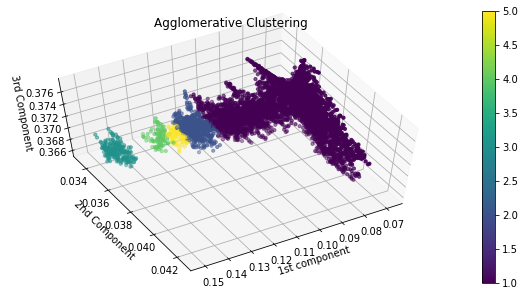

In [351]:
#Plot for min clustering
df_min = pd.DataFrame()
df_min = dfslice(df_final,'min_label', max_label_min) 

for i in range(5):
  label = i+1
  #replacing labels for easier usage
  df_min.min_label[df_min.min_label == max_label_min[i]] = label 

#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_min['A'],df_min['B'],df_min['C'],
                     c=df_min['min_label'],s=10)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

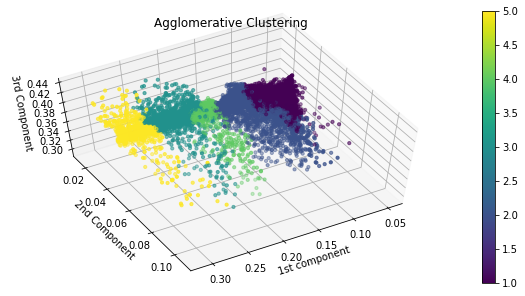

In [352]:
#Plot for max clustering
df_max = pd.DataFrame()
df_max = dfslice(df_final,'max_label', max_label_max)

for i in range(5):
  label = i+1
  df_max.max_label[df_max.max_label == max_label_max[i]] = label

#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_max['A'],df_max['B'],df_max['C'],
                     c=df_max['max_label'],s=10)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

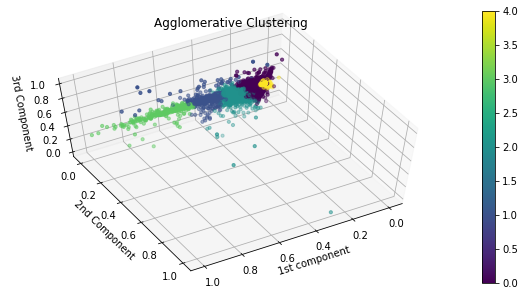

In [353]:
#Plot for ward clustering
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_final['A'],df_final['B'],df_final['C'],
                     c=df_final['ward_label'],s=10)
ax.set_title('Agglomerative Clustering')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

Based on the results obtained from above:
1. Based purely on SSE and MSE, the MIN clustering appears to be better, which is counter intuitive and against what we hypothesized. This might not happen for everyone, The reason is explained in point 3.
2. Ward technique seems to have more globular clusters, but they also have a lot of noise points. MIN seems to have one very large cluster, and non-globular shapes, but very compact shapes in terms of attribute values, indicating there isn't a lot of noise points. Max clustering lies somewhere in between, but indicates globular shapes as well. Ward does linkages based on minimising the within cluster variance, which would explain the globular structure. Min simply works on minimum dissimilarity, hence has the arbitraty shapes as seen.
3. In my case, the SSE favors the MIN clustering, and there is a very important and special reason why. Basically, we aimed at getting the five biggest clusters that we could find. In case of the MIN clustering, we had to dig very deep in order to get those clusters. At such a deep level, we inadvertantly eliminated a lot of the 'noisy' data that was at the higher level. This meant the points present in the top 5 clusters wer actually the relevant ones. For MAX clustering, we dug a bit deep, but not deep enough. So we go rid of some noise points but not as much as min. In the case of ward, since the clusterings in the start itself we so good, we did not need to go deep, meaning we it preserved all the noise points, leading to a highed SSE. 

##Task 4(b): Applying External measures

We now apply external measures, namely GINI, entropy and percentage of defaults on the 'default status' attribute to assess the quality of clusterings.

In [354]:
#Define a function to calculate the gini index
def gini(df,label):
  counts = []
  gini_cluster = []
  total = []
  sumtot = 0
  if label == 'ward_label':#the labels for ward i have are a bit different
    for j in (0,1):
      for i in range(5):
        #we store the counts of each class for each cluster and total count of a cluster
        df_test = df.loc[(df[label]==(i)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  else:
    for j in (0,1):#looping for 0 and 1
      for i in range(5):#looping for each cluster
        #we store the counts of each class for each cluster and total count of a cluster
        df_test = df.loc[(df[label]==(i+1)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  for i in range(5):
    #count[i] refers to 0, count[i+5] refers to 1
    tot = counts[i]+counts[i+5]
    total.append(tot)
    #calculate the gini for each cluster
    gini_node = 1 - ((counts[i]/tot)**2) - ((counts[i+5]/tot)**2)
    gini_cluster.append(gini_node)
  gini = 0
  for i in range(5):
    #calculate the overall
    gini += (total[i]/sumtot)*gini_cluster[i]

  return gini

#We similarly define entropy
def entropy(df,label):
  counts = []
  entropy_cluster = []
  total = []
  sumtot = 0
  if label == 'ward_label':#the labels for ward i have are a bit different
    for j in (0,1):
      for i in range(5):
        df_test = df.loc[(df[label]==(i)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  else:
    for j in (0,1):#looping for 0 and 1
      for i in range(5):#looping for each cluster
        df_test = df.loc[(df[label]==(i+1)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  for i in range(5):
    #count[i] refers to 0, count[i+5] refers to 1
    tot = counts[i]+counts[i+5]
    total.append(tot)
    entropy_node =  - ((counts[i]/tot)*math.log2(counts[i]/tot)) - ((counts[i+5]/tot)*math.log2(counts[i+5]/tot))
    entropy_cluster.append(entropy_node)
  entropy = 0
  for i in range(5):
    entropy += (total[i]/sumtot)*entropy_cluster[i]

  return entropy

#We similarly define percentage of defaults
def percent(df,label):
  counts = []
  percent_cluster = []
  total = []
  sumtot = 0
  if label == 'ward_label': #the labels for ward i have are a bit different
    for j in (0,1):
      for i in range(5):
        df_test = df.loc[(df[label]==(i)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  else:
    for j in (0,1):#looping for 0 and 1
      for i in range(5):#looping for each cluster
        df_test = df.loc[(df[label]==(i+1)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  for i in range(5):
    #count[i] refers to 0, count[i+5] refers to 1
    tot = counts[i]+counts[i+5]
    total.append(tot)
    percent_node =  (counts[i+5]/tot)*100
    percent_cluster.append(percent_node)
  percent = 0
  for i in range(5):
    percent += (total[i]/sumtot)*percent_cluster[i]

  return percent

#We similarly define purity
def purity(df,label):
  counts = []
  purity_cluster = []
  total = []
  sumtot = 0
  if label == 'ward_label':#the labels for ward i have are a bit different
    for j in (0,1):
      for i in range(5):
        df_test = df.loc[(df[label]==(i)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  else:
    for j in (0,1):
      for i in range(5):
        df_test = df.loc[(df[label]==(i+1)) & (df['default payment next month']==j)]
        counts.append(len(df_test))
        sumtot = sumtot + len(df_test)
  for i in range(5):
    #count[i] refers to 0, count[i+5] refers to 1
    tot = counts[i]+counts[i+5]
    total.append(tot)
    purity_node =  max((counts[i]/tot), (counts[i+5]/tot))
    purity_cluster.append(purity_node)
  purity = 0
  for i in range(5):
    purity += (total[i]/sumtot)*purity_cluster[i]

  return purity


In [355]:
print("GINI index for MIN clustering:",gini(df_min, 'min_label'))
print("GINI index for MAX clustering:",gini(df_max, 'max_label'))
print("GINI index for WARD clustering:",gini(df_final, 'ward_label'))
print("\n")

print("Entropy for MIN clustering:",entropy(df_min, 'min_label'))
print("Entropy for MAX clustering:",entropy(df_max, 'max_label'))
print("Entropy for WARD clustering:",entropy(df_final, 'ward_label'))
print("\n")

print("Percentage of Defaults for MIN clustering:",percent(df_min, 'min_label'))
print("Percentage of Defaults for MAX clustering:",percent(df_max, 'max_label'))
print("Percentage of Defaults for WARD clustering:",percent(df_final, 'ward_label'))
print("\n")

print("Purity for MIN clustering:",purity(df_min, 'min_label'))
print("Purity for MAX clustering:",purity(df_max, 'max_label'))
print("Purity for WARD clustering:",purity(df_final, 'ward_label'))

GINI index for MIN clustering: 0.40736143510967615
GINI index for MAX clustering: 0.35213659420691773
GINI index for WARD clustering: 0.34631961716319093


Entropy for MIN clustering: 0.8617254492327754
Entropy for MAX clustering: 0.7745390533494882
Entropy for WARD clustering: 0.7651019680863046


Percentage of Defaults for MIN clustering: 28.61713473160327
Percentage of Defaults for MAX clustering: 22.837026886547275
Percentage of Defaults for WARD clustering: 22.308333333333334


Purity for MIN clustering: 0.7138286526839673
Purity for MAX clustering: 0.7716297311345273
Purity for WARD clustering: 0.7769166666666667


We have the above values for GINI index, Entropy, Percentage of Defaults and an additional measure of purity. In the context of our application, Percentage of Defaults is actually useless. The values don't really tell us about the clusterings, just what is the percentage of 1/yes in each clustering.

The point of clustering, is to cluster data into groups of same or similar properties. Points in a cluster should be similar in some sense, that is homogenous with respect to one or more classes. The tool that clearly shows homogenity is the better tool. In the binary case, Purity is the better tool, since it lets us know how pure a clustering is with respect to the default class, and therefore the homogeinity. 

Among the three remaining measure, Entropy seems to be more interesting. More interesting information is denoted by higher GINI, higher Entropy, or lower purity. In this case, the difference in purity is very negligible as compared to entropy, so is GINI. Hence, Entropy seems to give us more interesting information. 

##Task 4(c): Data Analysis of Clusters for comparison

From the SSE calculation, we got MIN algorithm to be the best, and the top 5 clusters from it. We now want to perform some data analysis on the clusters for comparison, and visualize how the clusters would change upon change in attributes considered.

We first use various different attributes to perform clustering in addition to the PCA attributes, and visualize them using a cluster matrix plot. I also have made a plot of the original cluster matrix plot from our previous findings to compare them.

Later on, for the original min clustering, I plot the ditributions of various attribute values in each cluster, so that we can have some idea which attribute value is dominant, and in which cluster.

In [356]:
#We define a cluster plot functio 
def cluster_matrix(df, cols, title):
  df_sort = df.sort_values(by=['min_label'])

  # Create an empty list
  Row_list =[]
  index_list = []
  list_track = [] #adds the current cluster list to this incase we need to check clustering history
  # Iterate over each row
  for index, rows in df_sort.iterrows():
      my_list = []
      # Create list for the current row
      for i in range(len(cols)):
        my_list.append(rows[cols[i]])
      my_index = [index]  

      # append the list to the final list
      Row_list.append(my_list)
      index_list.append(my_index)

  # import important libraries
  import numpy as np
  from scipy.spatial import distance_matrix

  # compute the distance matrix
  dist_mat = distance_matrix(Row_list, Row_list, p=2)

  #Creating a similarity matric from distance matrix.
  sim_mat = np.ones((len(dist_mat),len(dist_mat))) - dist_mat

  #plotting
  plt.imshow(sim_mat)
  plt.title(title)
  plt.colorbar()
  plt.show()
  

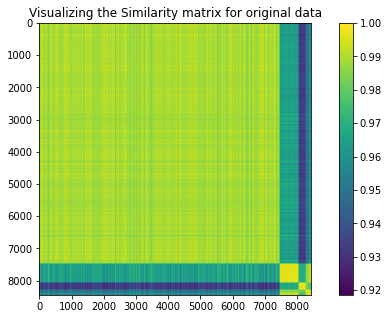

In [357]:
#First we plot for the original data
cluster_matrix(df_min, ['A','B','C'], 'Visualizing the Similarity matrix for original data')

For the original data, we can see the big cluster and the small clusters. The points in differnt clusters aren't as dissimilar as we thought, but they are very similar in the same cluster. Let us now plot for other attributes.

We ran Principal Component analysis to reduce the number of attributes to use. Let us use the original 18 attributes and what difference, if any, does it make.

2868  ->  668
696  ->  15
3  ->  19
2867  ->  22
1428  ->  17
2852  ->  25
9  ->  23
87  ->  14


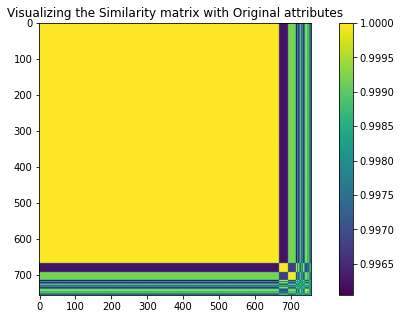

In [377]:
model_min18 = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_pca)

minfreq = CountFrequency(model_min18.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 10:
   print (key, " -> ", value)

max_label18 = sorted(minfreq, key=minfreq.get, reverse=True)[:5]
MIN = pd.concat([df, df_new], axis = 1)
MIN['min_label'] = model_min18.labels_

df__min18 = pd.DataFrame()
df_min18 = dfslice(MIN, 'min_label', max_label18)
for i in range(5):
  label = i+1
  df_min18.min_label[df_min18.min_label == max_label18[i]] = label

#we plot cluster matrix wrt the pca components (for the distance matrix)
cluster_matrix(df_min18, ['A','B','C'],'Visualizing the Similarity matrix with Original attributes')

Comparing the two clusterings, using PCA to reduce the number of attributes greatly helps us, as the data seems to be too spread, and the clusters are way too small. The similarity matrix plot shows one big cluster, and many small ones. It also shows how less the number of points is at that level. 

421  ->  61
53  ->  4037
1750  ->  943
874  ->  1089
108  ->  80
436  ->  262
106  ->  143
873  ->  250
1742  ->  115
3502  ->  56


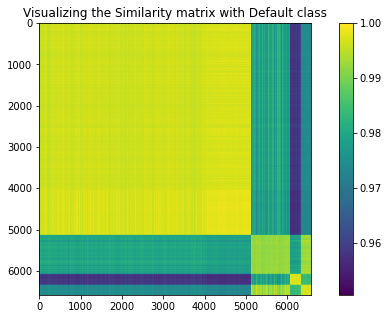

In [358]:
#We now add the default class to the pca attributes and run the clusterings.
#Parameters are same as the original, as we want to do comparison
df_class = pd.concat([df_new, df['default payment next month']], axis = 1)

model_min_class = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_class)

minfreq = CountFrequency(model_min_class.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 50:
   print (key, " -> ", value)

max_label_class = sorted(minfreq, key=minfreq.get, reverse=True)[:5]
MIN = pd.concat([df, df_new], axis = 1)
MIN['min_label'] = model_min_class.labels_

df_class_min = pd.DataFrame()
df_class_min = dfslice(MIN, 'min_label', max_label_class)
for i in range(5):
  label = i+1
  df_class_min.min_label[df_class_min.min_label == max_label_class[i]] = label

#we plot cluster matrix wrt the pca components (for the distance matrix)
cluster_matrix(df_class_min, ['A','B','C'],'Visualizing the Similarity matrix with Default class')

The number of points are less than the original, and the big cluser size is smaller, meaning the points are more spread when we add the default class. Also, it seens some clusters are very close to each other, hence not visible, and only visible as one big one. 

13  ->  2392
909  ->  64
0  ->  2751
228  ->  229
113  ->  476
2  ->  118
56  ->  150
914  ->  78
27  ->  166
454  ->  124


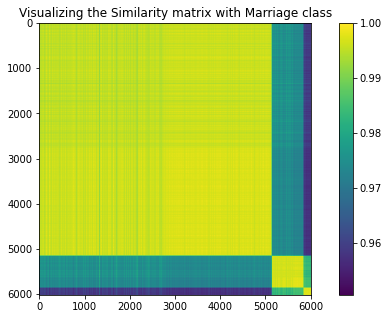

In [359]:
#We now add the marriage class to the pca attributes and run the clusterings.
#Parameters are same as the original, as we want to do comparison
df_mar = pd.concat([df_new, df['MARRIAGE']], axis = 1)

model_min_mar = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_mar)

minfreq = CountFrequency(model_min_mar.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 50:
   print (key, " -> ", value)

max_label_mar = sorted(minfreq, key=minfreq.get, reverse=True)[:5]
MIN = pd.concat([df, df_new], axis = 1)
MIN['min_label'] = model_min_mar.labels_

df_mar_min = pd.DataFrame()
df_mar_min = dfslice(MIN, 'min_label', max_label_mar)
for i in range(5):
  label = i+1
  df_mar_min.min_label[df_mar_min.min_label == max_label_mar[i]] = label

cluster_matrix(df_mar_min, ['A','B','C'],'Visualizing the Similarity matrix with Marriage class')

Number of points is even lower with marriage attribute being considered, meaning the points are even more spread. Also, it seens some clusters are very close to each other, hence not visible, and only visible as one big one. 

112  ->  1649
0  ->  686
451  ->  3225
55  ->  329
225  ->  197
904  ->  270
891  ->  55
897  ->  62
13  ->  98


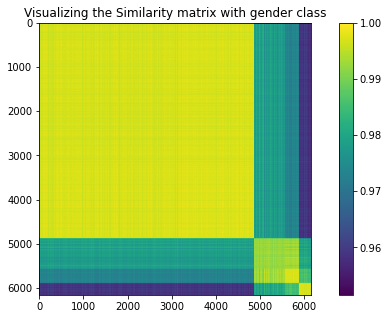

In [360]:
#We now add the gender class to the pca attributes and run the clusterings.
#Parameters are same as the original, as we want to do comparison
df_sex = pd.concat([df_new, df['SEX']], axis = 1)

model_min_sex = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_sex)

minfreq = CountFrequency(model_min_sex.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 50:
   print (key, " -> ", value)
max_label_sex = sorted(minfreq, key=minfreq.get, reverse=True)[:5]
MIN = pd.concat([df, df_new], axis = 1)
MIN['min_label'] = model_min_sex.labels_

df_sex_min = pd.DataFrame()
df_sex_min = dfslice(MIN, 'min_label', max_label_sex)
for i in range(5):
  label = i+1
  df_sex_min.min_label[df_sex_min.min_label == max_label_sex[i]] = label

cluster_matrix(df_sex_min, ['A','B','C'],'Visualizing the Similarity matrix with gender class')


Similar trend for the gender class

28  ->  1757
476  ->  517
958  ->  2094
954  ->  67
432  ->  467
0  ->  220
475  ->  233
950  ->  116
6  ->  61


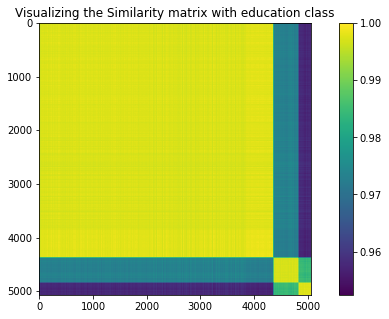

In [361]:
#We now add the education class to the pca attributes and run the clusterings.
#Parameters are same as the original, as we want to do comparison
df_ed = pd.concat([df_new, df['EDUCATION']], axis = 1)

model_min_ed = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_ed)

minfreq = CountFrequency(model_min_ed.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 50:
   print (key, " -> ", value)

max_label_ed = sorted(minfreq, key=minfreq.get, reverse=True)[:5]
MIN = pd.concat([df, df_new], axis = 1)
MIN['min_label'] = model_min_ed.labels_

df_ed_min = pd.DataFrame()
df_ed_min = dfslice(MIN, 'min_label', max_label_ed)
for i in range(5):
  label = i+1
  df_ed_min.min_label[df_ed_min.min_label == max_label_ed[i]] = label

cluster_matrix(df_ed_min, ['A','B','C'],'Visualizing the Similarity matrix with education class')

Similar trend for education class, and number of points is even lesser, meaning more spread. 

626  ->  118
312  ->  143
625  ->  96
627  ->  175
2512  ->  116
37  ->  104
1247  ->  117
2504  ->  55
38  ->  104
76  ->  115
5030  ->  125
2509  ->  76
77  ->  118
2500  ->  67
10062  ->  90
313  ->  113
1248  ->  77
10068  ->  139
20  ->  74
2516  ->  105
155  ->  73
1226  ->  68


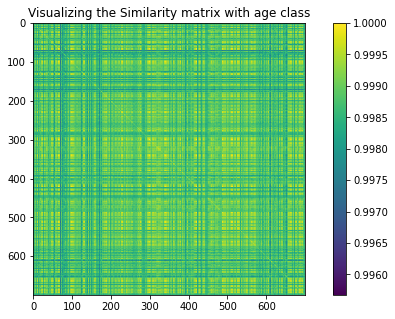

In [362]:
#We now add the age class to the pca attributes and run the clusterings.
#Parameters are same as the original, as we want to do comparison
df_age = pd.concat([df_new, df['AGE']], axis = 1)

model_min_age = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_age)

minfreq = CountFrequency(model_min_age.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 50:
   print (key, " -> ", value)

max_label_age = sorted(minfreq, key=minfreq.get, reverse=True)[:5]
MIN = pd.concat([df, df_new], axis = 1)
MIN['min_label'] = model_min_age.labels_

df_age_min = pd.DataFrame()
df_age_min = dfslice(MIN, 'min_label', max_label_age)
for i in range(5):
  label = i+1
  df_age_min.min_label[df_age_min.min_label == max_label_age[i]] = label

cluster_matrix(df_age_min, ['A','B','C'],'Visualizing the Similarity matrix with age class')

The data points are now so spread with the addition of age class, there is no dominant or clearly big cluster. In fact the points are very very close to each other in this case, and the total number of points in the top 5 clusters is only almost 700. The Age attribute is continuous valued with a range of ages, while others are categorical, which might factor into this.

We now take the data for the original class and plot various attribute value variations for the clusters.

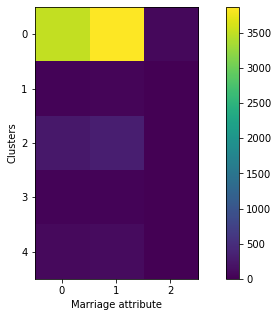

In [363]:
#We plot variation of Marriage attribute values with the clusters

#take a slice of original data to make plotting easy
df_min = dfslice(df_final, 'min_label', max_label_min)
marriage = df_min['MARRIAGE'].unique()
label = df_min['min_label'].unique()

tab = np.zeros((len(label), len(marriage)))

#Making an array with counts of points with particular attribute values
for i in marriage:
  for j in range(len(label)):
    tab[j,i-1] = len(df_min[(df_min['MARRIAGE']==i) & (df_min['min_label']==label[j])])

plt.imshow(tab)
plt.colorbar()
plt.xlabel('Marriage attribute')
plt.ylabel('Clusters')
plt.show()


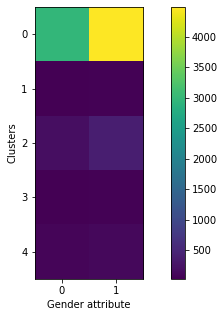

In [364]:
#We plot variation of Gender attribute with clusters

sex = df_min['SEX'].unique()
label = df_min['min_label'].unique()

tab = np.zeros((len(label), len(sex)))

for i in sex:
  for j in range(len(label)):
    tab[j,i-1] = len(df_min[(df_min['SEX']==i) & (df_min['min_label']==label[j])])

plt.imshow(tab)
plt.colorbar()
plt.xlabel('Gender attribute')
plt.ylabel('Clusters')
plt.show()

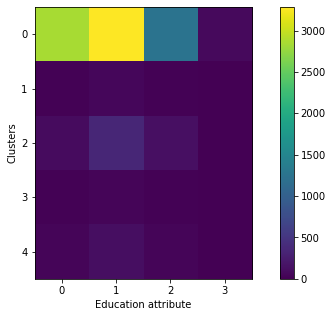

In [365]:
#We plot the variation of education attribute value with clusters
education = df_min['EDUCATION'].unique()
label = df_min['min_label'].unique()

tab = np.zeros((len(label), len(education)))

for i in education:
  for j in range(len(label)):
    tab[j,i-1] = len(df_min[(df_min['EDUCATION']==i) & (df_min['min_label']==label[j])])

plt.imshow(tab)
plt.colorbar()
plt.xlabel('Education attribute')
plt.ylabel('Clusters')
plt.show()

##Task 4(d): Clustering without Normalization

At the start of the assignment, we normalize the PCA attributes obtained, to perform clustering. We give the reason that normalization makes sure that noise or extreme values donot sway our algorithms to give bad results. But we want to test that reason. Hence we use the unnormalized versions to perform clustering(All algorithms), and then check how it fares against the normalizaed one.

Please note, the algorithms are run on the same parameters as the final version of the normalized data ones.

In [378]:
X_train = df_pca
pca = PCA(n_components=3, random_state=100)
X = pca.fit_transform(X_train) #We get the unnormalized PCA attributes

df_unnorm = pd.DataFrame(X, columns = ['A','B','C'])

dfunnorm = pd.concat([df,df_unnorm], axis=1) #new dataframe with unnormalized attributes

#MIN Clustering
#Clustering performed with same parameters for better comparison.
model_min_unnorm = AgglomerativeClustering(distance_threshold=0.00055, affinity = 'euclidean', n_clusters=None, linkage='single', compute_distances=True).fit(df_unnorm)

minfreq = CountFrequency(model_min_unnorm.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in minfreq.items():
  if value > 10:
   print (key, " -> ", value)


714  ->  669
21  ->  11
81  ->  15
174  ->  19
1429  ->  30
10  ->  17
352  ->  11
707  ->  22
1421  ->  17
706  ->  25
176  ->  26
177  ->  11
2856  ->  14


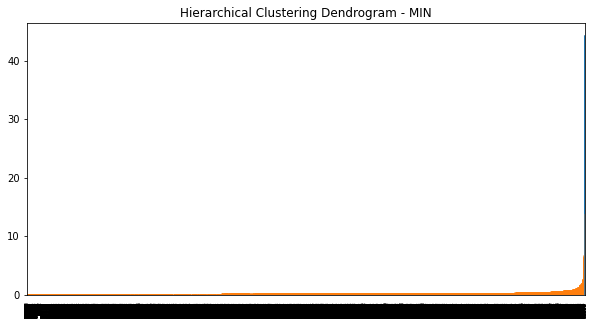

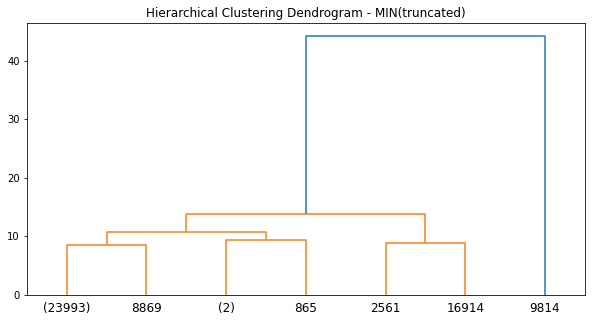

In [379]:
plt.title('Hierarchical Clustering Dendrogram - MIN') #Full dendogram
plot_dendrogram(model_min_unnorm)
plt.show()

plt.title('Hierarchical Clustering Dendrogram - MIN(truncated)') #Truncated dendogram to a certain level
plot_dendrogram(model_min_unnorm, truncate_mode="level", p=3)
plt.show()

In [380]:
#MAX clustering
model_max_unnorm = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=75, linkage='complete', compute_distances=True).fit(df_unnorm)

maxfreq = CountFrequency(model_max_unnorm.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in maxfreq.items():
  if value > 50:
   print (key, " -> ", value)

20  ->  15460
2  ->  4150
3  ->  688
8  ->  431
36  ->  183
53  ->  1368
26  ->  206
74  ->  70
15  ->  62
1  ->  128
30  ->  296
14  ->  51
6  ->  123
49  ->  54
16  ->  93
23  ->  59
51  ->  56


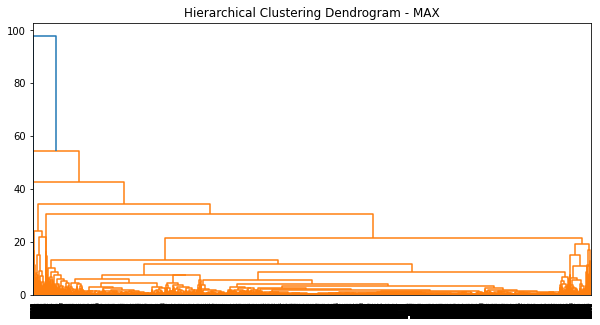

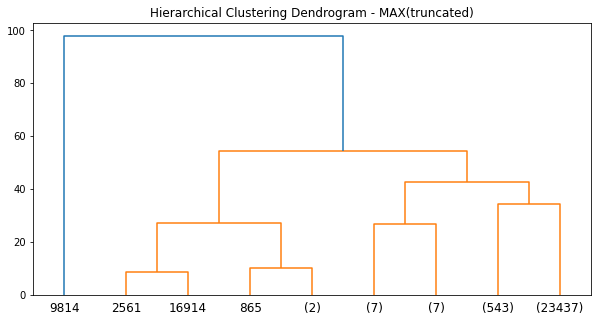

In [384]:
plt.title('Hierarchical Clustering Dendrogram - MAX') #Full dendogram
plot_dendrogram(model_max_unnorm)
plt.show()

plt.title('Hierarchical Clustering Dendrogram - MAX(truncated)') #Truncated dendogram to a certain level
plot_dendrogram(model_max_unnorm, truncate_mode="level", p=3)
plt.show()

In [382]:
#WARD clustering
model_ward_unnorm = AgglomerativeClustering(distance_threshold=None, affinity = 'euclidean', n_clusters=5, linkage='ward', compute_distances=True).fit(df_unnorm)

wardfreq = CountFrequency(model_ward_unnorm.labels_)
 
# iterate dictionary named as freq to print
# count of each element
for (key, value) in wardfreq.items():
  if value > 50:
   print (key, " -> ", value)

2  ->  17385
4  ->  3392
3  ->  1521
0  ->  1211
1  ->  491


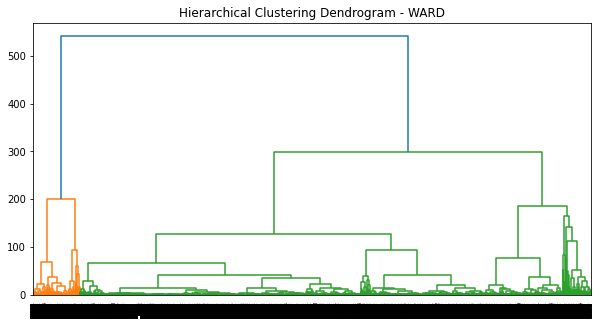

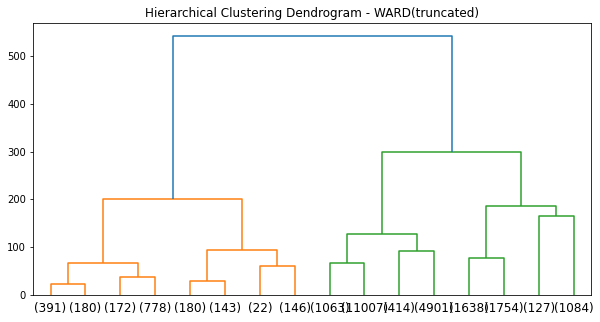

In [385]:
plt.title('Hierarchical Clustering Dendrogram - WARD') #Full dendogram
plot_dendrogram(model_ward_unnorm)
plt.show()

plt.title('Hierarchical Clustering Dendrogram - WARD(truncated)') #Truncated dendogram to a certain level
plot_dendrogram(model_ward_unnorm, truncate_mode="level", p=3)
plt.show()

Right of the bat, we notice difference in cluser sizes. For MIN algorithm, the points are more spread out at that level, hence the cluster sizes are very small. One could say since we did not normalize, the distances are too large, leading to poor clustering for the MIN algorithm. The opposite is observed for MAX and ward, with the biggest cluster size being larger than the normalized case, meaning the clusters are spread out less. The SSE will give us a better look at the quality of clusterings as compared to the original.

In [369]:
#Creating sorted list for top 5 clusters in each case
unnorm_label_min = sorted(minfreq, key=minfreq.get, reverse=True)[:5]
unnorm_label_max = sorted(maxfreq, key=maxfreq.get, reverse=True)[:5]
unnorm_label_ward = sorted(wardfreq, key=wardfreq.get, reverse=True)[:5]
#New dataframe with cluster labels from each case
dfunnorm['min_label'] = model_min_unnorm.labels_
dfunnorm['max_label'] = model_max_unnorm.labels_
dfunnorm['ward_label'] = model_ward_unnorm.labels_

#Sliced dataframe for easier usage
df_min_unnorm = pd.DataFrame()
df_min_unnorm = dfslice(dfunnorm, 'min_label', unnorm_label_min) 
for i in range(5):
  label = i+1
  df_min_unnorm.min_label[df_min_unnorm.min_label == unnorm_label_min[i]] = label

#Sliced dataframe for easier usage
df_max_unnorm = pd.DataFrame()
df_max_unnorm = dfslice(dfunnorm, 'max_label', unnorm_label_max)
for i in range(5):
  label = i+1
  df_max_unnorm.max_label[df_max_unnorm.max_label == unnorm_label_max[i]] = label

df_ward_unnorm = dfunnorm

In [370]:
df_final_unnorm = df_ward_unnorm #Final dataframe for unnormalized attributes
SSE(df_final_unnorm,'ward_dev', 'ward_label', unnorm_label_ward) #calculating distances from function
SSE(df_final_unnorm,'max_dev', 'max_label', unnorm_label_max)
SSE(df_final_unnorm,'min_dev', 'min_label', unnorm_label_min)

SSE_min_unnorm = (np.power((df_final_unnorm['min_dev']),2)).sum() #calculating the SSE from distances
SSE_max_unnorm= (np.power((df_final_unnorm['max_dev']),2)).sum()
SSE_ward_unnorm = (np.power((df_final_unnorm['ward_dev']),2)).sum()

print("SSE for Unnormalized MIN clustering:", SSE_min_unnorm)
print("SSE for Unnormalized MAX clustering:", SSE_max_unnorm)
print("SSE for Unnormalized WARD clustering:", SSE_ward_unnorm)
print("\n")

SSE for Unnormalized MIN clustering: 7.530142993706307e-05
SSE for Unnormalized MAX clustering: 19268.006051801105
SSE for Unnormalized WARD clustering: 94024.32470213412




Based on SSE itself, we can figure out a lot of things. Firstly, because the point are so spread out in MIN, the SSE is lesser than the original, but this isn't a good thing because we lose a lot of data while taking only top 5.\
Secondly, the SSE for MIN and WARD are way too high. This means the noise points are present, and are clearly affecting the clusterings. This is what we mean by Noise points swaying the results. The distances/deviations are so large, the SSE is getting affected by it. One would describe this very poor clustering.

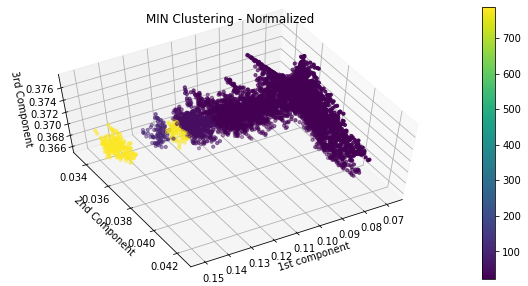

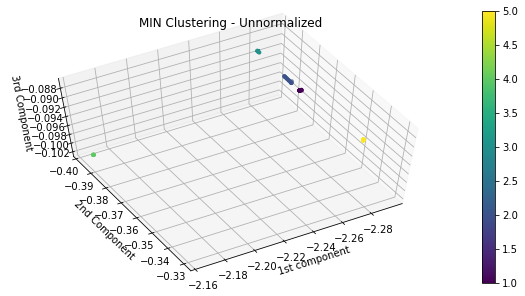

In [371]:
#Plot the clusters obtained using Agglomerative clustering and compare
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_min['A'],df_min['B'],df_min['C'],
                     c=df_min['min_label'],s=10)
ax.set_title('MIN Clustering - Normalized')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_min_unnorm['A'],df_min_unnorm['B'],df_min_unnorm['C'],
                     c=df_min_unnorm['min_label'],s=10)
ax.set_title('MIN Clustering - Unnormalized')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

As we can see there are barely any points in the clusters. Also notice how the clusters are very far away from each other, implying not normalizing leads to greater distances, and hence the MIN algorithm performs poorly.

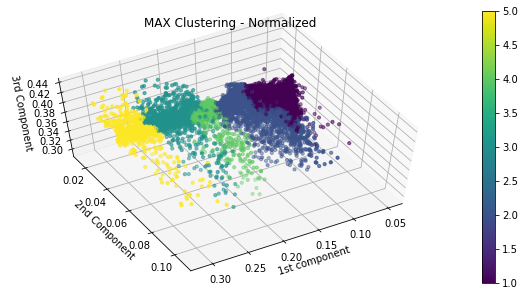

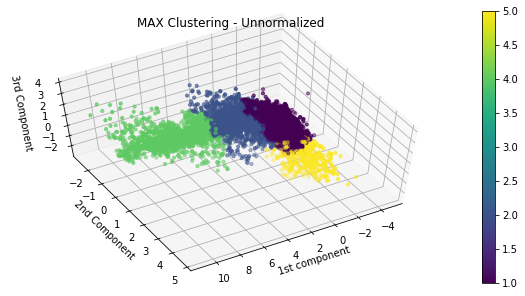

In [372]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_max['A'],df_max['B'],df_max['C'],
                     c=df_max['max_label'],s=10)
ax.set_title('MAX Clustering - Normalized')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_max_unnorm['A'],df_max_unnorm['B'],df_max_unnorm['C'],
                     c=df_max_unnorm['max_label'],s=10)
ax.set_title('MAX Clustering - Unnormalized')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

The clusters are more globular and more dense in the case of the Unnormalized case. But in the normalized case, we can kind of clearly see where the noise points are, while in the case of unnormalized one, its just big globules of points. Also notice the axis ranges. These contribute to the large SSE.

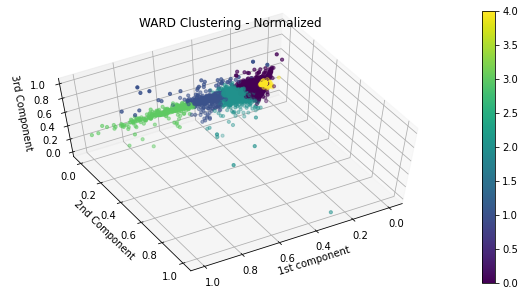

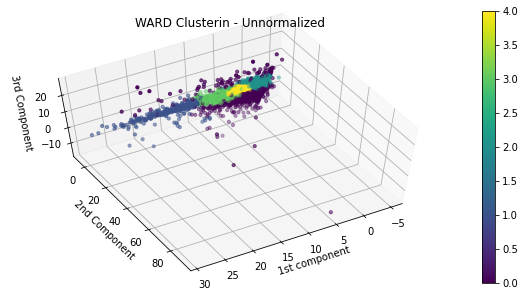

In [373]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_final['A'],df_final['B'],df_final['C'],
                     c=df_final['ward_label'],s=10)
ax.set_title('WARD Clustering - Normalized')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(60, 60)
scatter = ax.scatter(df_final_unnorm['A'],df_final_unnorm['B'],df_final_unnorm['C'],
                     c=df_final_unnorm['ward_label'],s=10)
ax.set_title('WARD Clusterin - Unnormalized')
ax.set_xlabel('1st component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')
plt.colorbar(scatter)

WARD clustering works similarly for both cases, except in the case of normalized clustering, the clusters are a bit more 'defined' in terms of cluster boundaries, whereas we can see points of the dark blue cluster spread across the space. Also, the axes for the unnormalized case shows why the SSE was so large. And also makes us wonder if all these points actually deserve to be in these clusterings. 